In [153]:
# Extract info from the BANK data set and perform SVM classifications

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import GSML

from zipfile import ZipFile

In [155]:
# unzip the file 

with ZipFile("../bank.zip") as z:
    with z.open("bank.csv") as f:
        df_bank= pd.read_csv(f, sep=";")

In [156]:
df_bank.head(-10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4506,42,unemployed,divorced,tertiary,no,-166,no,no,cellular,29,aug,85,4,-1,0,unknown,no
4507,33,services,married,secondary,no,288,yes,no,cellular,17,apr,306,1,-1,0,unknown,no
4508,42,admin.,married,unknown,no,642,yes,yes,unknown,16,may,509,2,-1,0,unknown,no
4509,51,technician,married,tertiary,no,2506,no,no,cellular,30,nov,210,3,-1,0,unknown,no


In [157]:
len(df_bank)

4521

In [158]:
# check the data types
for i in df_bank.columns.to_list():
    if df_bank[i].dtype == 'object':
        print (df_bank[i].value_counts())
        print("/n"+ '* - '* 10)

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
/n* - * - * - * - * - * - * - * - * - * - 
married     2797
single      1196
divorced     528
Name: marital, dtype: int64
/n* - * - * - * - * - * - * - * - * - * - 
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64
/n* - * - * - * - * - * - * - * - * - * - 
no     4445
yes      76
Name: default, dtype: int64
/n* - * - * - * - * - * - * - * - * - * - 
yes    2559
no     1962
Name: housing, dtype: int64
/n* - * - * - * - * - * - * - * - * - * - 
no     3830
yes     691
Name: loan, dtype: int64
/n* - * - * - * - * - * - * - * - * - * - 
cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64
/n* - * - * - * - * - * - * - * - * - * - 
may    

In [159]:
# d. Extract the DatFrame column labeled "y" as your Y variable,
    # yes/no data to 1/0 for the "y" column

Y= df_bank["y"].apply(lambda x: "1" if x=="yes" else "0")

In [160]:
# convert to Np array 
Y= np.array(Y)
Y

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

# e. Use the remaining columns inot your X data.
convert the categoical dta into numerical using get_dummies and then into numpy array

In [161]:
# for x we will select the remaining observed features
df_bank.head(8)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no


In [162]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [163]:
df_bank.columns.to_list()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [164]:
df_bank.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [165]:
#X= df_bank[["housing", "loan"]]

#X= pd.get_dummies(df_bank.iloc[:,:-1])
#X= df_bank[["job", "marital", "education", "contact", "housing","loan","month"]]
X= df_bank.drop(labels=['y'], axis=1)
#X= np.array(X)

In [166]:
# use get_dummies to make categorical values to 0 or 1
X= pd.get_dummies(X)
X.head(10)

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
5,35,747,23,141,2,176,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,36,307,14,341,1,330,2,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7,39,147,6,151,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8,41,221,14,57,2,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
9,43,-88,17,313,1,147,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [167]:
X= np.array(X)

In [168]:
# Now scale the X data 
from sklearn.preprocessing import MinMaxScaler

In [169]:
scaler= MinMaxScaler()
x_scaled= scaler.fit_transform(X) # within range 0 and 1

In [170]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# now lets plot a ROC curve
from sklearn.metrics import roc_curve

In [171]:
xtrain, xtest, ytrain, ytest= train_test_split(x_scaled,Y)

In [172]:
len(xtrain), len(xtest), len(ytrain), len(ytest)

(3390, 1131, 3390, 1131)

C:\Users\daiko\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\daiko\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


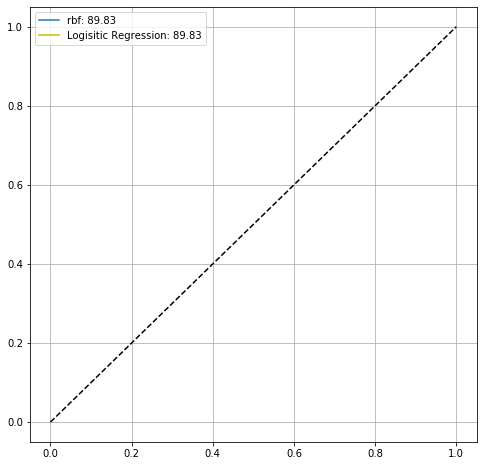

In [180]:
# now fit the train dat sets into the model
# Get the accuracy of the predict model

SVM= SVC(kernel= "rbf", probability= True)
SVM.fit(xtrain, ytrain)
ypredict= SVM.predict(xtest)

SVM_acc= accuracy_score(ytest, ypredict)


# using Support Vector machine MODEL we will make roc curve

#SVM.fit(xtrain, ytrain)
prob= SVM.predict_proba(xtest)[:,1] # selecting everything from Second Column

FPR, TPR, Thresholds= roc_curve(ytest, prob, pos_label= 2)

plt.plot(FPR, TPR, label="rbf: %.2f"%(SVM_acc *100))


from sklearn.linear_model import LogisticRegression as LR

# classify with logisitic Regression

model_LR= LR(max_iter= 5000)
model_LR.fit(xtrain, ytrain)
ypredict_LR= model_LR.predict(xtest)

accuracy_LR= accuracy_score( ytest, ypredict)
proba= model_LR.predict_proba( xtest)[:, 1]


# pos-label for y_true is in {-1,1} or {0,1}
FPR, TPR, Thresholds= roc_curve(ytest, proba, pos_label= 1)

plt.plot( FPR, TPR, c='y', label='Logisitic Regression: %.2f'%(accuracy_LR *100))

# plot with x-axis (0,1) and y-axis(0,1)
plt.plot([0,1], [0,1], ls='--', c='k')

plt.legend()
plt.grid()
plt.gcf().set_size_inches(8,8)
plt.show()

In [ ]:
# reshape the array
#Y= Y.reshape(-1,1)

In [ ]:
#FPR

In [ ]:
#plt.plot(FPR, TPR, c='red', label="POLY")